In [29]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_train_50.csv')
print(train_data.shape)
train_data.head()

(69, 51)


,FNC40,FNC33,FNC20,SBM_map67,SBM_map61,SBM_map36,SBM_map17,FNC48,FNC37,FNC353,...,FNC289,FNC285,FNC278,FNC275,FNC23,FNC213,FNC211,FNC210,FNC177,Class
0,-0.042770,0.21967,0.023462,-0.553621,-0.048894,-0.666222,0.393087,-0.16328,-0.068833,-0.020897,...,0.003765,-0.25555,-0.22028,0.091184,-0.189860,0.094641,0.45274,0.350390,-0.012638,1
1,0.026720,0.82281,-0.146650,-0.300549,-0.030364,-0.336090,0.964257,0.71657,0.447540,-0.227980,...,0.469910,-0.36558,-0.49325,0.013791,0.561350,0.083160,0.48699,0.723200,-0.000896,0
2,-0.081407,0.44264,0.012487,-0.081175,1.332840,1.172378,-1.050905,0.60398,-0.169190,-0.252030,...,0.020654,-0.15788,0.39020,0.213510,-0.090663,0.326170,-0.18757,0.390630,-0.111880,1
3,-0.365520,0.21516,0.195540,0.220316,-0.982331,-1.062109,0.137624,0.22927,-0.086613,-0.230490,...,0.465930,-0.11343,-0.18818,-0.023861,0.338460,0.407870,0.28285,0.231020,0.126880,1
4,-0.054571,0.47644,0.506320,-0.370420,0.313340,0.212350,1.952477,-0.33573,0.198670,-0.266090,...,0.362940,-0.44335,0.13523,0.221310,-0.044503,0.021357,0.37870,0.004384,0.079035,1


In [3]:
in_dim = 50
out_dim = 2

In [15]:
class ClassicalLR(torch.nn.Module):
    def __init__(self, torch):
        super(ClassicalLR, self).__init__()
        self.layer1 = torch.nn.Linear(in_dim, 20)
        self.layer2 = torch.nn.Linear(20, 30)
        self.out = torch.nn.Linear(30, out_dim)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer1(x))
        x = torch.nn.functional.relu(self.layer2(x))
        output = torch.nn.functional.log_softmax(self.out(x), dim=1) 
        return output
    
classical_model = ClassicalLR(torch)

In [16]:
X_train = train_data.loc[:, train_data.columns != 'Class']
y_train = train_data['Class']

X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.LongTensor(np.array(y_train))

In [17]:
def classic_train(iterations, model, torch, optim, data, target, criterion):
    
    losses = []
    
    for i in range(iterations):
        
        optim.zero_grad()
        
        output = model(data)

        loss = criterion(output, target)
        
        loss_item = loss.item()
        
        if i % 10 == 0:
            print("Epoch", i, "loss", loss_item)
        
        losses.append(loss_item)
        
        loss.backward()
        
        optim.step()
        
    return losses

In [18]:
params = classical_model.parameters()
optim = torch.optim.Adam(params=params, lr=0.1)
criterion = torch.nn.NLLLoss()

In [19]:
iteration = 100
losses = classic_train(iteration, classical_model, torch, optim, X_train, y_train, criterion)

Epoch 0 loss 0.6984010338783264
Epoch 10 loss 0.00032507238211110234
Epoch 20 loss 4.502453521126881e-05
Epoch 30 loss 1.0748902241175529e-05
Epoch 40 loss 1.0766014383989386e-05
Epoch 50 loss 8.073785465967376e-06
Epoch 60 loss 5.76807633478893e-06
Epoch 70 loss 4.365503627923317e-06
Epoch 80 loss 3.501799483274226e-06
Epoch 90 loss 2.93173343379749e-06


Text(0.5, 0, 'iteration')

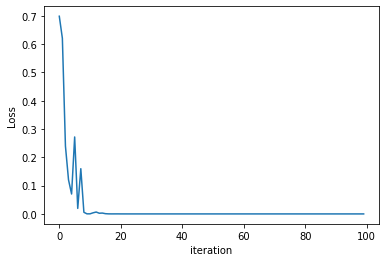

In [22]:
plt.plot(range(iteration), losses)
plt.ylabel('Loss')
plt.xlabel('iteration')

In [23]:
test_data = pd.read_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_test_50.csv')
print(test_data.shape)
test_data.head()

(17, 51)


,FNC40,FNC33,FNC20,SBM_map67,SBM_map61,SBM_map36,SBM_map17,FNC48,FNC37,FNC353,...,FNC289,FNC285,FNC278,FNC275,FNC23,FNC213,FNC211,FNC210,FNC177,Class
0,0.34404,0.64302,0.148900,-0.791032,0.829697,-0.026555,0.187573,0.515280,0.485810,0.273290,...,0.116160,0.11131,-0.14180,0.43596,0.40514,0.49545,0.62594,0.488840,0.15221,0
1,-0.12732,0.25707,0.373060,0.889753,-0.978412,-1.027496,1.961955,0.176950,-0.105510,-0.499290,...,0.110400,0.24471,0.16378,0.14387,-0.34615,0.43485,0.21171,-0.177450,0.19885,1
2,0.34123,0.66877,0.338740,0.785572,-0.896406,-0.213169,0.313224,0.253410,0.098053,-0.316810,...,-0.085182,-0.16643,0.26968,0.57360,-0.25904,0.61563,0.55868,0.447560,-0.36652,1
3,0.24601,0.59077,-0.067104,-1.522856,1.739382,1.574719,-1.308689,-0.033231,-0.304670,0.500520,...,0.078982,-0.51740,-0.57098,0.46945,0.19352,-0.22173,-0.10941,0.336160,-0.13141,0
4,-0.17317,0.51587,0.277670,-0.256770,0.263038,0.833339,-0.051214,0.679640,0.499420,0.083208,...,0.194680,0.21828,0.27271,0.37475,0.69264,0.36131,0.14574,0.027857,-0.11404,0


In [24]:
X_test = test_data.loc[:, test_data.columns != 'Class']
y_test = test_data['Class']

In [25]:
X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.LongTensor(np.array(y_test))

In [27]:
preds = []
with torch.no_grad():
    for i in range(len(X_test)):
        sample = X_test[i]
        y_hat = classical_model(sample.unsqueeze(0))
        pred = y_hat.argmax().item()
        print(f"Prediction: {pred} Ground Truth: {y_test[i]}")
        preds.append(pred)

Prediction: 0 Ground Truth: 0
Prediction: 1 Ground Truth: 1
Prediction: 1 Ground Truth: 1
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 1
Prediction: 1 Ground Truth: 1
Prediction: 0 Ground Truth: 0
Prediction: 1 Ground Truth: 1
Prediction: 1 Ground Truth: 1
Prediction: 0 Ground Truth: 1
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0


False positive at index 8 and 13

In [30]:
acc = accuracy_score(y_test, preds)
print("Overall test accuracy", acc*100)

Overall test accuracy 88.23529411764706
